### imports & globals

In [135]:
import os 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import cv2

n = 8
k = 10
Npix = 512
img = np.random.normal(0.0, 1.0, size=(Npix, Npix))

os.getcwd()
img = cv2.imread('/content/drive/MyDrive/cat.jpg', cv2.IMREAD_GRAYSCALE)
print(type(img), img.shape)


<class 'numpy.ndarray'> (1200, 1200)


### downsample

In [136]:
def downsample(x, k=k):
  dx = x.reshape((
      x.shape[0] // k, k,
      x.shape[1] // k, k
  ))
  return dx.mean(axis=(1,3)) 

def norm(x):
  return (x - x.min()) / (x.max() - x.min())

### image partitioning
partition image by normalised pixel density

In [137]:
def density_partition(x, n=n):
  x = norm(x)
  x_channels = np.zeros((n, *x.shape))

  for _ in range(n):
    y = np.zeros_like(x)
    cond_ = (_ / n < x) & (x < (_ + 1) / n)
    ix_ = np.argwhere(cond_)
    # print(_ / n, (_+1) / n, ix_)
    
    y[ix_[:,0], ix_[:,1]] = x[ix_[:,0], ix_[:,1]]
    x_channels[_] = y
  return x_channels

def density_partition2(x, n=n):
  x = norm(x)
  y = np.zeros_like(x)
  fills = [2 ** _ for _ in range(n)]

  for _ in range(n):
    cond_ = (_ / n < x) & (x < (_ + 1) / n)
    ix_ = np.argwhere(cond_)

    # print(_ / n, (_+1) / n, ix_)
    y[ix_[:,0], ix_[:,1]] = fills[_] #x[ix_[:,0], ix_[:,1]]
  return y

### randomised colourmap for each partition

In [138]:
def make_cmap(rgb):
  r, g, b = rgb
  N = 256
  vals = np.ones((N, 4))
  # vals[:, 0] = np.linspace(r / 256, 1, N)
  # vals[:, 1] = np.linspace(g / 256, 1, N)
  i = np.random.randint(0,2)
  vals[:, i] = np.linspace(b / 256.0, 1.0, N)
  map = ListedColormap(vals)
  rgba = (1-0.99,1-0.99,1-0.99)
  # map.set_over(rgba, alpha=0.0)
  map.set_under(rgba, alpha=0.0)
  return map

### plotting

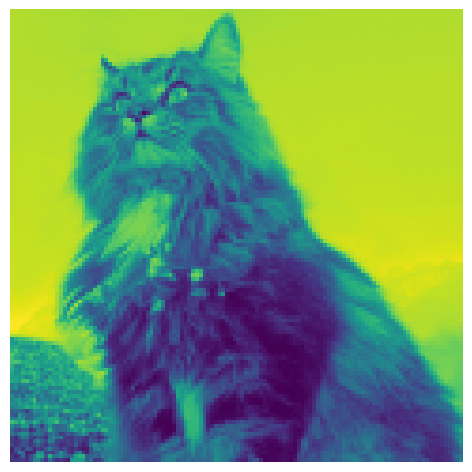

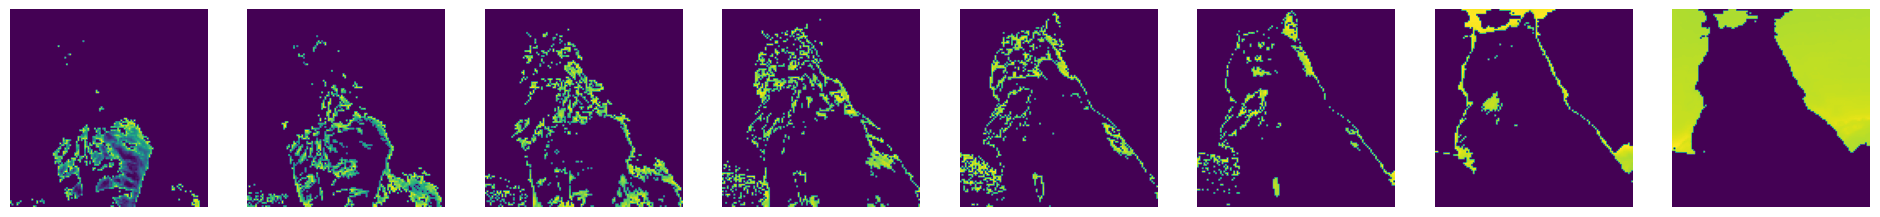

In [139]:
X = density_partition(downsample(img))

plt.figure(figsize=(6,6), dpi=100)
plt.imshow(downsample(img))
plt.axis('off')

fig, axs = plt.subplots(1, n, figsize=(24,5), dpi=100)
for i,ax in enumerate(axs):
  ax.imshow(X[i])
  ax.axis('off')

def make_cmap(rgb):
  r, g, b = rgb
  N = 256
  vals = np.ones((N, 4))
  # vals[:, 0] = np.linspace(r / 256, 1, N)
  # vals[:, 1] = np.linspace(g / 256, 1, N)
  i = np.random.randint(0,2)
  vals[:, i] = np.linspace(b / 256.0, 1.0, N)
  map = ListedColormap(vals)
  rgba = (1-0.99,1-0.99,1-0.99)
  # map.set_over(rgba, alpha=0.0)
  map.set_under(rgba, alpha=0.0)
  return map


(-0.5, 119.5, 119.5, -0.5)

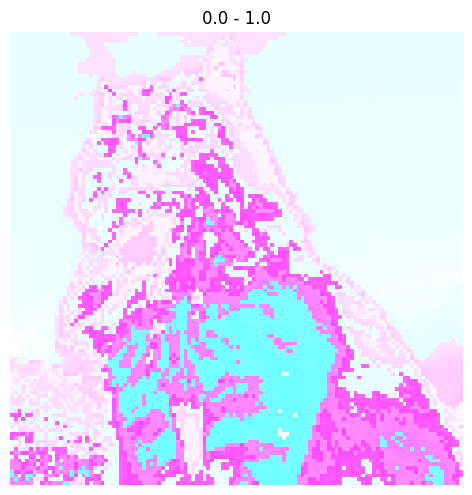

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=100)
for x in X:
  ax.set_title("%.1f - %.1f" % (X[i].min(), X[i].max()))
  ax.imshow(x,
            alpha=1, 
            cmap=make_cmap(np.random.randint(0,256,size=3)),
            interpolation='none', 
            clim=[1e-4, 1])
ax.axis('off')

(-0.5, 119.5, 119.5, -0.5)

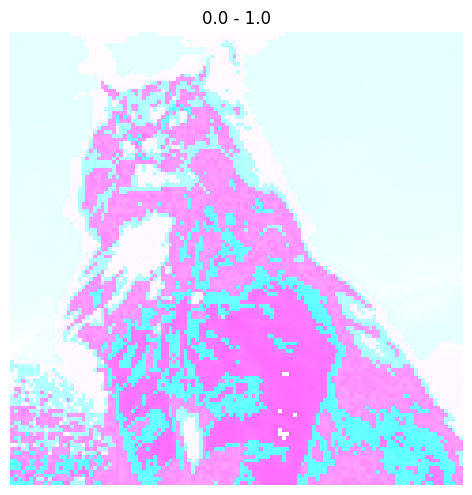

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=100)
ix = [_ for _ in range(n)]
for i,x in zip(ix,X):
  ax.set_title("%.1f - %.1f" % (X[i].min(), X[i].max()))
  ax.imshow(X[i],
            alpha=1, 
            cmap=make_cmap(np.random.randint(0,256,size=3)),
            interpolation='none', 
            clim=[1e-4, 1])
ax.axis('off')


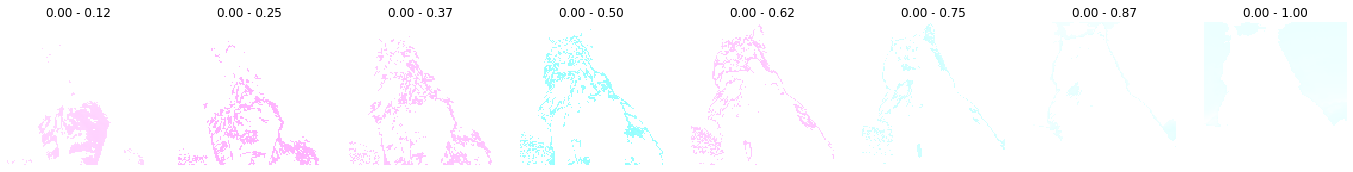

In [142]:
fig, axs = plt.subplots(1,n, figsize=(24,6))
# np.random.shuffle(ix)
for i,ax in zip(ix, axs):
  ax.set_title("%.2f - %.2f" % (X[i].min(), X[i].max()))
  ax.imshow(X[i],
            alpha=0.7, 
            cmap=make_cmap(np.random.randint(0,256,size=3)),
            interpolation='none', 
            clim=[1e-4, 1])
  ax.axis('off')

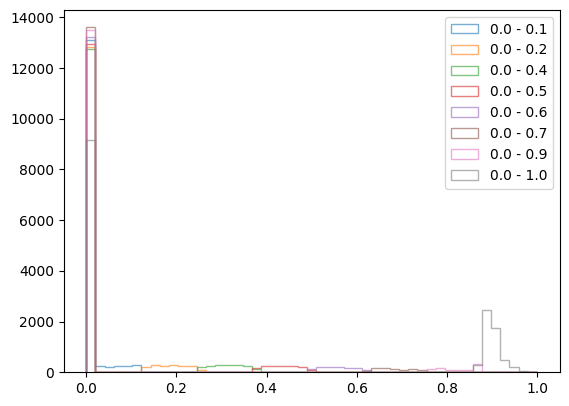

In [143]:
fig, ax = plt.subplots(figsize=(6.4,4.8), dpi=100)
for x in X:
  plt.hist(x.flatten(), histtype='step', 
           bins=np.linspace(0.0,1.0,50), alpha=0.6,
           label="%.1f - %.1f" % (x.min(), x.max()))
plt.legend()

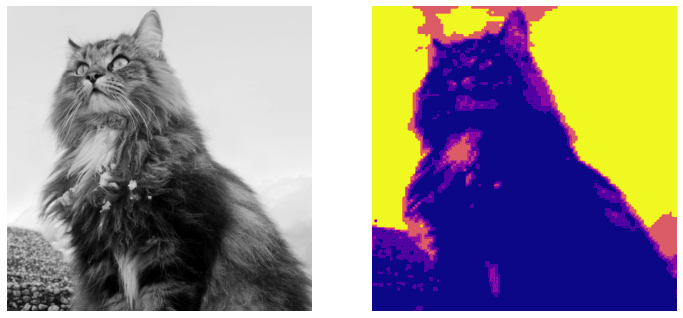

In [144]:
part_img = density_partition2(downsample(img))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,12))
ax1.imshow(img, cmap='gray')
ax1.axis('off')
p = ax2.imshow(part_img, cmap=cm.get_cmap("plasma", n))
ax2.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='20%', pad=0.5)
fig.colorbar(p, cax=cax, orientation='vertical')
plt.show()
# ax2.imshow(img, cmap=cm.get_cmap("magma", n))

60 60


[]

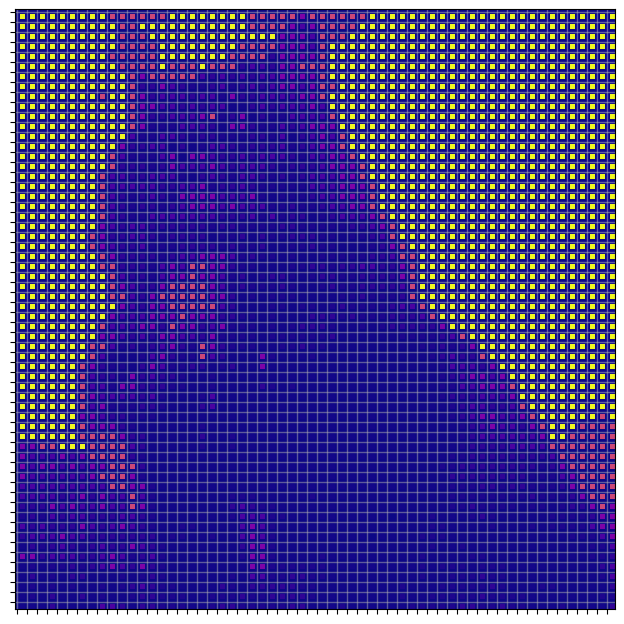

In [152]:
import matplotlib.ticker as plticker

# Open image file
image = part_img
dpi = 100.
k_grid = 2

# Set up figure
fig, ax = plt.subplots(#figsize=(float(image.shape[0]) / dpi, 
                       #         float(image.shape[1]) / dpi), 
                       figsize=(6,6),
                       dpi=dpi)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Set the gridding interval: here we use the major tick interval
loc = plticker.MultipleLocator(base=k_grid)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid

ax.grid(which='major', axis='both', linestyle='-', lw=1, alpha=0.5)
ax.imshow(image, cmap='plasma')

# Find number of gridsquares in x and y direction
nx = abs(int(float(ax.get_xlim()[1] - ax.get_xlim()[0]) / float(k_grid)))
ny = abs(int(float(ax.get_ylim()[1] - ax.get_ylim()[0]) / float(k_grid)))

print(nx, ny)

# Add some labels to the gridsquares
for j in range(ny):
    y = k_grid / 2 + j * k_grid
    for i in range(nx):
        x = k_grid / 2. + float(i) * k_grid
        # ax.text(x, y,'{:d}'.format(i + j * nx), 
                # color='w', ha='center', va='center', alpha=0.5)
# ax.axis('off')        
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])

[]

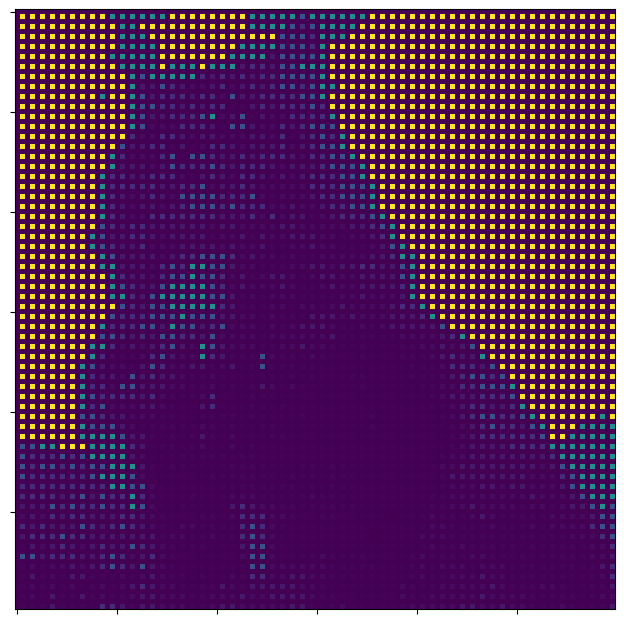

In [146]:
dx, dy = 2,2

# Open image file
image = part_img
dpi = 100.
k_grid = 0.5

# Set up figure
fig, ax = plt.subplots(#figsize=(float(image.shape[0]) / dpi, 
                       #         float(image.shape[1]) / dpi), 
                       figsize=(6,6),
                       dpi=dpi)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Add the grid
# Modify the image to include the grid
image[:,::dy] = 0
image[::dx,:] = 0

# ax.grid(which='major', axis='both', linestyle='-', lw=1)
ax.imshow(image)
  
# ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])

(array([12378.,   297.,   203.,     0.,     0.,   220.,     0.,     0.,
            0.,  1302.]),
 array([  0. ,  12.8,  25.6,  38.4,  51.2,  64. ,  76.8,  89.6, 102.4,
        115.2, 128. ]),
 <a list of 10 Patch objects>)

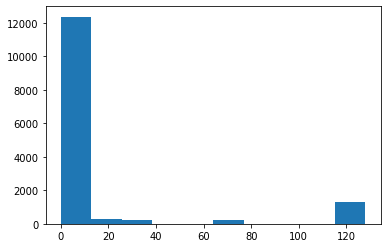

In [147]:
plt.figure()
plt.hist(part_img.flatten(), bins=None)